# Cross reference DBTL3 ART model and DBTL0/1/2 ART model
We used one CRISPRi plasmid for DBTL0/1/2 and then switched to an improved plasmid in DBTL3. Hence, the data generated in DBTL0/1/2 is not directly comparable with DBTL3. Here, I want to compare the recommendations between models. Ideally, we want to select ART3 recommendations that are not already explored in DBTL0/1/2.

In [1]:
import edd_utils as eddu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import random
random.seed(1)

In [2]:
import os
import sys
from pathlib import Path
art_path = '../../'
sys.path.append('.')   # Add local directory to access some of the functions
sys.path.append('../') # Make sure this is the location for the ART library
sys.path.append(art_path)
import warning_utils
warning_utils.filter_end_user_warnings()

import copy
from IPython.display import Image  # Used to display images
import cloudpickle

from art.core import RecommendationEngine
import art.utility as utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 1. Import `rec_df`, `data_df`, and trained ART model.

Import recommendation dataframe

In [3]:
fig_loc = './dbtl3ONLY_figures_and_analysis/'
art3_path = './dbtl3ONLY_art_outputs/art.cpkl'
rec_df = pd.read_pickle('./dbtl3ONLY_figures_and_analysis/dbtl0_dbtl1_dbtl3_rec_df_filtered_training_data.pkl')
data_df = pd.read_pickle(f'./dbtl3ONLY_figures_and_analysis/dbtl3ONLY_isoprenol_processed_df.pkl')
filtered_rec_df = pd.read_csv(f'./dbtl3ONLY_figures_and_analysis/filtered_recs_for_dbtl4.csv')
with open(art3_path, 'rb') as art_file:
    art3 = cloudpickle.load(art_file)

art012_rec_df = pd.read_pickle('./dbtl2_figures_and_analysis/dbtl0_dbtl1_dbtl2_rec_df_filtered_training_data.pkl')
art012_path = './dbtl2_art_outputs/art.cpkl'
with open(art012_path, 'rb') as art_file:
    art012 = cloudpickle.load(art_file)
    


In [4]:
feature_columns = art012_rec_df.columns[:-2]

In [5]:
rec_df.head(3)

,PP_0226,PP_0368,PP_0437,PP_0528,PP_0597,PP_0658,PP_0751,PP_0774,PP_0812,PP_0813,...,PP_4550,PP_4651,PP_4667,PP_4678,PP_4679,PP_4862,PP_5186,PP_5288,pp_mean,pp_std
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.029207,43.148880
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.042345,43.166398
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323.230039,43.137712


In [6]:
filtered_rec_df.shape

(100, 7)

In [7]:
filtered_rec_df

,Unnamed: 0,line_name,pp_mean,pp_std,number_of_grna,in_expt,to_rec
0,10241,PP_0751_PP_0814_PP_1506,419.292418,43.057640,3,0,1
1,10260,PP_0751_PP_0814_PP_4120,419.292418,43.057640,3,0,1
2,179864,PP_0751_PP_0814_PP_1769_PP_4120,418.369692,43.091220,4,0,1
3,179743,PP_0751_PP_0814_PP_1506_PP_1769,418.369692,43.091220,4,0,1
4,179759,PP_0751_PP_0814_PP_1506_PP_4120,418.369692,43.091220,4,0,1
...,...,...,...,...,...,...,...
95,5626,PP_0437_PP_2136_PP_4120,194.527000,44.094554,3,0,1
96,5517,PP_0437_PP_1769_PP_2136,194.527000,44.094554,3,0,1
97,5945,PP_0437_PP_4120_PP_4191,193.689633,44.027308,3,0,1
98,5432,PP_0437_PP_1506_PP_4191,193.689633,44.027308,3,0,1


In [8]:
art012_rec_df

,PP_0226,PP_0368,PP_0437,PP_0528,PP_0597,PP_0658,PP_0751,PP_0774,PP_0812,PP_0813,...,PP_4550,PP_4651,PP_4667,PP_4678,PP_4679,PP_4862,PP_5186,PP_5288,pp_mean,pp_std
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.350007,48.128889
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.658695,48.136470
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.139382,48.131059
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.665476,48.133767
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,372.816237,48.181475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,170.395227,48.404601
425920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,178.625734,48.335396
425921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,153.302668,48.314757
425922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,173.123261,48.439434


In [9]:
filtered_rec_df.loc[:,'art012_pp_mean'] = np.nan
filtered_rec_df.loc[:,'art012_pp_std'] = np.nan


for idx, filtered_rec in filtered_rec_df.iterrows():
    split_targets = np.sort(re.findall('PP_[0-9]{4}', filtered_rec['line_name']))
    # print(split_targets)
    num_grna = filtered_rec['number_of_grna']
    # if num_grna == 1:
    #     art012_rec_idx = (
    #         (art012_rec_df[split_targets[0]] == 1) & 
    #         (art012_rec_df.loc[:, feature_columns].sum(axis = 1) == num_grna)
    #     )
    # elif num_grna == 2:
    #     art012_rec_idx = (
    #         (art012_rec_df[split_targets[0]] == 1) & 
    #         (art012_rec_df[split_targets[1]] == 1) &
    #         (art012_rec_df.loc[:, feature_columns].sum(axis = 1) == num_grna)
    #     )
    # elif num_grna == 3:
    #     art012_rec_idx = (
    #         (art012_rec_df[split_targets[0]] == 1) & 
    #         (art012_rec_df[split_targets[1]] == 1) &
    #         (art012_rec_df[split_targets[2]] == 1) &
    #         (art012_rec_df.loc[:, feature_columns].sum(axis = 1) == num_grna)
    #     )
    # elif num_grna == 4:
    #     art012_rec_idx = (
    #         (art012_rec_df[split_targets[0]] == 1) & 
    #         (art012_rec_df[split_targets[1]] == 1) &
    #         (art012_rec_df[split_targets[2]] == 1) &
    #         (art012_rec_df[split_targets[3]] == 1) &
    #         (art012_rec_df.loc[:, feature_columns].sum(axis = 1) == num_grna)
    #     )
    
    art012_rec_idx = (
        (
            np.all(
                np.stack(
                    [np.array(art012_rec_df[target_column] == 1) for target_column in split_targets]
                ), 
                axis = 0)
        ) &
        (art012_rec_df.loc[:, feature_columns].sum(axis = 1) == num_grna)
    )
    # print(f'idx = {idx} loc_idx match? {np.all(art012_rec_idx==art012_rec_idx_test)} where(idx) = {np.where(art012_rec_idx)} where(test_idx) = {np.where(art012_rec_idx_test)}')
    assert sum(art012_rec_idx) == 1
    # print(np.where(art012_rec_idx))
    filtered_rec_df.loc[idx, ['art012_pp_mean', 'art012_pp_std']] = art012_rec_df.loc[art012_rec_idx, ['pp_mean', 'pp_std']].values    

In [10]:
filtered_rec_df

,Unnamed: 0,line_name,pp_mean,pp_std,number_of_grna,in_expt,to_rec,art012_pp_mean,art012_pp_std
0,10241,PP_0751_PP_0814_PP_1506,419.292418,43.057640,3,0,1,359.560627,48.898055
1,10260,PP_0751_PP_0814_PP_4120,419.292418,43.057640,3,0,1,355.643901,48.234527
2,179864,PP_0751_PP_0814_PP_1769_PP_4120,418.369692,43.091220,4,0,1,352.631499,48.568526
3,179743,PP_0751_PP_0814_PP_1506_PP_1769,418.369692,43.091220,4,0,1,359.725519,49.140997
4,179759,PP_0751_PP_0814_PP_1506_PP_4120,418.369692,43.091220,4,0,1,357.363178,48.970442
...,...,...,...,...,...,...,...,...,...
95,5626,PP_0437_PP_2136_PP_4120,194.527000,44.094554,3,0,1,250.028398,48.341938
96,5517,PP_0437_PP_1769_PP_2136,194.527000,44.094554,3,0,1,255.886299,48.907646
97,5945,PP_0437_PP_4120_PP_4191,193.689633,44.027308,3,0,1,317.171721,48.185420
98,5432,PP_0437_PP_1506_PP_4191,193.689633,44.027308,3,0,1,321.414207,48.384543


Text(0, 0.5, 'ART0/1/2 predicted mean')

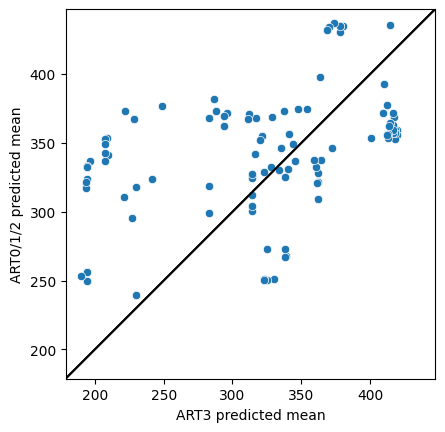

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(data = filtered_rec_df, x = 'pp_mean', y = 'art012_pp_mean', ax = ax)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.axline((300,300), slope=1, color='black')
ax.set_xlabel('ART3 predicted mean')
ax.set_ylabel('ART0/1/2 predicted mean')

In [12]:
filtered_rec_df.loc[
    (
        (filtered_rec_df['art012_pp_mean']<280) & 
        (filtered_rec_df['pp_mean']>260)
    ),
    ['line_name', 'pp_mean', 'art012_pp_mean']
]

,line_name,pp_mean,art012_pp_mean
42,PP_0815_PP_4192,339.091610,267.703931
44,PP_0815_PP_1506,338.101730,266.994208
45,PP_0815_PP_1769,338.101730,273.234519
49,PP_0368_PP_4192,329.890685,251.214204
52,PP_0368_PP_2136,325.158155,250.493747
53,PP_0368_PP_0437,325.024222,273.309338
54,PP_0368_PP_4120,323.170860,251.259842
55,PP_0368_PP_1506,323.170860,250.452991
